In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from astropy.io import fits
from astropy.table import Table

plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 24,
    'axes.labelsize': 'large',
    'mathtext.fontset': 'stix'
})

from mpdg_som import SelfOrganizingMap
from mpdg_som_utils import SOM_LearningRateFunctions

In [3]:
#load in data produced in primary_targeting_region.ipynb
cut_data_file = '/data2/lsajkov/mpdg/data_products/GAMA/GAMA_primtarg_snr100_lms6_12_25jun2024.fits'

with fits.open(cut_data_file) as cat:
    GAMA_vect_data = Table(cat[1].data)

GAMA_vect_data.add_column(GAMA_vect_data['r_mag_err'], index = 4, name = 'surf_bright_r_err')

In [4]:
SOM = SelfOrganizingMap([32, 32],
                        initialization = 'random')

In [5]:
SOM.load_data(GAMA_vect_data['r_mag', 'gr_color', 'surf_bright_r'],
              variable_names = ['r_mag', 'gr_color', 'surf_bright_r'])

In [ ]:
SOM.load_standard_deviations(GAMA_vect_data['r_mag_err', 'gr_color_err', 'surf_bright_r_err'])

In [6]:
SOM.build_SOM()

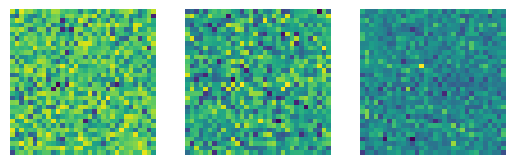

In [7]:
fig = plt.figure()
for i, name in enumerate(SOM.variable_names):
    ax = fig.add_subplot(1, 3, i + 1)
    ax.imshow(SOM.SOM[:, :, i], origin = 'lower')
    ax.axis('off')

In [ ]:
SOM.calculate_chi_sq_dist(SOM.SOM[0][0],
                          SOM.data[0],
                          SOM.variances[0])

In [ ]:
random_idx = np.random.rand(*SOM.mapsize) * SOM.data_len
random_idx = np.array(random_idx, dtype = int)

In [ ]:
SOM.data[random_idx]

In [ ]:
initialized_som = 

In [ ]:
np.mean(random_idx)

In [ ]:
plt.plot(np.random.rand(range(100)))

In [ ]:
(random1 * random2)

In [ ]:
SOM.SOM[0][0]

In [ ]:
SOM.data

In [ ]:
SOM.chi_sq_dist(SOM.data[0],
                SOM.data[1])

In [ ]:
from numpy import linalg as linalg

In [ ]:
covar_matrix = np.diagflat(SOM.data[1])
inv_covar_matrix = linalg.inv(covar_matrix)

In [ ]:
vect.T * inv_covar_matrix * vect

In [ ]:
np.dot(vect, inv_covar_matrix * vect)

In [ ]:
vect * inv_covar_matrix

In [ ]:
np.inner(vect, inv_covar_matrix)

In [ ]:
np.dot(vect, inv_covar_matrix)

In [ ]:
np.dot(vect, np.dot(vect, inv_covar_matrix))

In [ ]:
vect = SOM.data[0]

In [ ]:
np.invert(np.diagflat([1, 1, 1]))

In [ ]:
SOM.SOM

In [ ]:
#At this point, presumably, we build a matrix that describes a bunch of vectors.
#Each vector would then correspond to a cell in the map.
